## Langkah 5: Penggalian Informasi Awal

### 1. Muat Data dan Inspeksi Dasar

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur agar pandas menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Muat dataset (asumsi nama file adalah application_train.csv)
try:
    df_train = pd.read_csv('application_train.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("File 'application_train.csv' tidak ditemukan. Mohon periksa nama file Anda.")
    # Jika nama file berbeda, ganti 'application_train.csv' di atas

# 1. Cek bentuk data (Jumlah baris dan kolom)
print(f"Bentuk data: {df_train.shape}")

# 2. Cek tipe data dan non-null counts
print("\nInfo Tipe Data dan Missing Values (Ringkas):")
df_train.info()

# 3. Cek duplikat berdasarkan ID unik
duplicate_ids = df_train.duplicated(subset=['SK_ID_CURR']).sum()
print(f"\nJumlah ID duplikat (SK_ID_CURR): {duplicate_ids}")

Dataset berhasil dimuat.
Bentuk data: (307511, 122)

Info Tipe Data dan Missing Values (Ringkas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

Jumlah ID duplikat (SK_ID_CURR): 0


### 2. Analisis Variabel Target


Distribusi Variabel TARGET:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Persentase:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


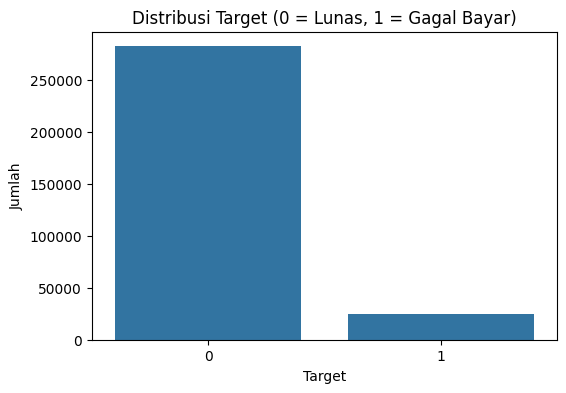

In [16]:
# 4. Cek distribusi variabel TARGET
print("\nDistribusi Variabel TARGET:")
target_counts = df_train['TARGET'].value_counts()
target_percent = df_train['TARGET'].value_counts(normalize=True) * 100

print(target_counts)
print(f"\nPersentase:\n{target_percent}")

# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df_train)
plt.title('Distribusi Target (0 = Lunas, 1 = Gagal Bayar)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

### 3. Analisis Missing Values

In [17]:
# 5. Hitung persentase missing values untuk setiap kolom
def get_missing_values(data):
    missing_values = data.isnull().sum()
    percent_missing = (missing_values / len(data)) * 100
    missing_data = pd.DataFrame({
        'Jumlah Missing': missing_values,
        'Persentase Missing (%)': percent_missing
    })
    missing_data = missing_data[missing_data['Persentase Missing (%)'] > 0]
    missing_data = missing_data.sort_values(by='Persentase Missing (%)', ascending=False)
    return missing_data

# Tampilkan 30 kolom dengan missing values terbanyak
missing_info = get_missing_values(df_train)
print("\nKolom dengan Missing Values Terbanyak (Top 30):")
print(missing_info.head(30))


Kolom dengan Missing Values Terbanyak (Top 30):
                          Jumlah Missing  Persentase Missing (%)
COMMONAREA_MEDI                   214865               69.872297
COMMONAREA_AVG                    214865               69.872297
COMMONAREA_MODE                   214865               69.872297
NONLIVINGAPARTMENTS_MEDI          213514               69.432963
NONLIVINGAPARTMENTS_MODE          213514               69.432963
NONLIVINGAPARTMENTS_AVG           213514               69.432963
FONDKAPREMONT_MODE                210295               68.386172
LIVINGAPARTMENTS_MODE             210199               68.354953
LIVINGAPARTMENTS_MEDI             210199               68.354953
LIVINGAPARTMENTS_AVG              210199               68.354953
FLOORSMIN_MODE                    208642               67.848630
FLOORSMIN_MEDI                    208642               67.848630
FLOORSMIN_AVG                     208642               67.848630
YEARS_BUILD_MODE                  204488 

### 4. Analisis Statistik Deskriptif

In [18]:
# 6. Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif (Numerik):")
print(df_train.describe().T)

# 7. Statistik deskriptif untuk kolom kategorikal (object)
print("\nStatistik Deskriptif (Kategorikal):")
print(df_train.describe(include='object').T)

# Cek anomali spesifik di kolom DAYS_EMPLOYED
# (Seringkali ada nilai aneh seperti 365243)
print("\nNilai unik di DAYS_EMPLOYED (Top 5):")
print(df_train['DAYS_EMPLOYED'].value_counts().head(5))

# Cek anomali spesifik di kolom DAYS_BIRTH (dalam tahun)
print(f"\nUsia Peminjam (Min): {int(round(df_train['DAYS_BIRTH'].min() / -365, 0))} tahun")
print(f"Usia Peminjam (Max): {int(round(df_train['DAYS_BIRTH'].max() / -365, 0))} tahun")


Statistik Deskriptif (Numerik):
                               count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

      

## Langkah 6 : Data Cleaning dan Data Processing (Preprocessing)

### 1. Membersihkan Anomali DAYS_EMPLOYED

In [19]:
# Ganti nilai anomali 365243 di DAYS_EMPLOYED dengan NaN
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].replace(365243, np.nan)

print("Nilai anomali 365243 di DAYS_EMPLOYED telah diganti dengan NaN.")

Nilai anomali 365243 di DAYS_EMPLOYED telah diganti dengan NaN.


### 2. Menghapus Kolom dengan Missing Values Tinggi

In [20]:
# Ambil dari kode sebelumnya
missing_info = get_missing_values(df_train)

# Dapatkan daftar kolom yang akan di-drop (missing > 50%)
cols_to_drop = missing_info[missing_info['Persentase Missing (%)'] > 50].index.tolist()

# Drop kolom-kolom tersebut
df_train = df_train.drop(columns=cols_to_drop)

print(f"Berhasil menghapus {len(cols_to_drop)} kolom dengan missing values > 50%.")
print(f"Bentuk data baru: {df_train.shape}")

Berhasil menghapus 41 kolom dengan missing values > 50%.
Bentuk data baru: (307511, 81)


### 3. Feature Engineering Sederhana (Konversi Kolom DAYS)

In [21]:
# Ubah DAYS_BIRTH menjadi AGE (positif, dalam tahun)
df_train['AGE'] = df_train['DAYS_BIRTH'] / -365
print("Kolom 'AGE' berhasil dibuat.")

# Ubah DAYS_EMPLOYED menjadi YEARS_EMPLOYED (positif, dalam tahun)
# Kita sudah membersihkan anomali, jadi ini aman
df_train['YEARS_EMPLOYED'] = df_train['DAYS_EMPLOYED'] / -365
print("Kolom 'YEARS_EMPLOYED' berhasil dibuat.")

# Ubah DAYS_REGISTRATION menjadi YEARS_REGISTRATION (positif, dalam tahun)
df_train['YEARS_REGISTRATION'] = df_train['DAYS_REGISTRATION'] / -365
print("Kolom 'YEARS_REGISTRATION' berhasil dibuat.")

# Buang kolom DAYS_ yang lama
df_train = df_train.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'])

print("Kolom 'DAYS_' yang asli telah dihapus.")

Kolom 'AGE' berhasil dibuat.
Kolom 'YEARS_EMPLOYED' berhasil dibuat.
Kolom 'YEARS_REGISTRATION' berhasil dibuat.
Kolom 'DAYS_' yang asli telah dihapus.


### 4. Imputasi dan Encoding (Persiapan)

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identifikasi kolom kategorikal (tipe 'object')
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Cek jumlah kategori unik di setiap kolom kategorikal
# INI PENTING untuk menentukan strategi encoding (One-Hot vs. Label)
print("\nJumlah Kategori Unik (Kolom Kategorikal):")
print(df_train[categorical_cols].nunique().sort_values(ascending=False))

# 2. Identifikasi kolom numerik
# (Semua kolom selain 'TARGET', 'SK_ID_CURR', dan kolom kategorikal)
numeric_cols = df_train.select_dtypes(include=np.number).columns.drop(['TARGET', 'SK_ID_CURR'])

# 3. Buat pipeline preprocessing
#    Kita akan menggunakan pipeline agar prosesnya rapi dan bisa diterapkan 
#    ke data tes nanti.

# Pipeline untuk data numerik:
# 1. Imputasi missing values dengan MEDIAN (lebih tahan outlier daripada mean)
# 2. Scaling (menyamakan skala)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk data kategorikal:
# 1. Imputasi missing values dengan 'missing_value' (sebagai kategori baru)
# 2. One-Hot Encoding (mengubah kategori menjadi kolom 0/1)
#    handle_unknown='ignore' -> jika ada kategori baru di data tes, abaikan
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # atau strategy='constant', fill_value='Missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabungkan pipeline menggunakan ColumnTransformer
# Ini akan menerapkan transformer yang tepat ke kolom yang tepat
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Biarkan kolom sisanya (TARGET, SK_ID_CURR)
)

print("\nPipeline preprocessing (Imputasi & Scaling/Encoding) telah dibuat.")


Jumlah Kategori Unik (Kolom Kategorikal):
ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
CODE_GENDER                    3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

Pipeline preprocessing (Imputasi & Scaling/Encoding) telah dibuat.


## Langkah 7: Penggalian Insight (Mengacu pada Objective)

### 1. Insight dari Fitur Numerik Kunci

C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\289923642.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'AGE'], label='Lunas (Target=0)', shade=True)
C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\289923642.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'AGE'], label='Gagal Bayar (Target=1)', shade=True)


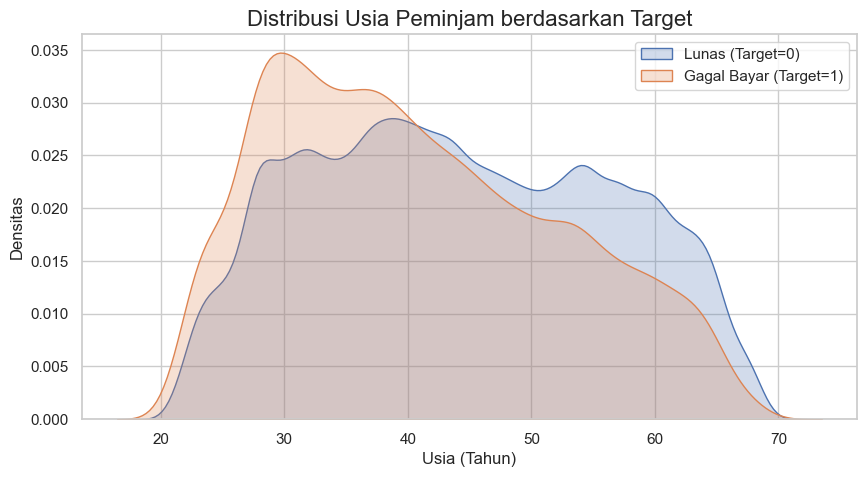

C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\289923642.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_plot.loc[df_train_plot['TARGET'] == 0, 'AMT_INCOME_TOTAL'], label='Lunas (Target=0)', shade=True)
C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\289923642.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train_plot.loc[df_train_plot['TARGET'] == 1, 'AMT_INCOME_TOTAL'], label='Gagal Bayar (Target=1)', shade=True)


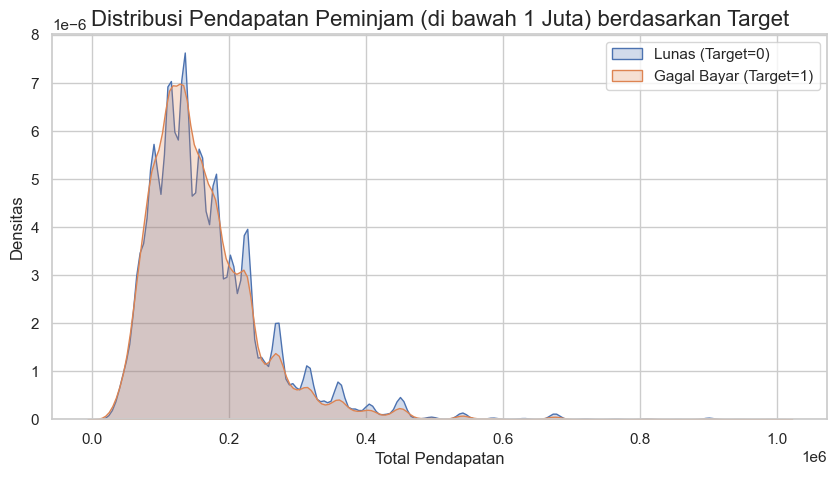

C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\289923642.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'AMT_CREDIT'], label='Lunas (Target=0)', shade=True)
C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\289923642.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'AMT_CREDIT'], label='Gagal Bayar (Target=1)', shade=True)


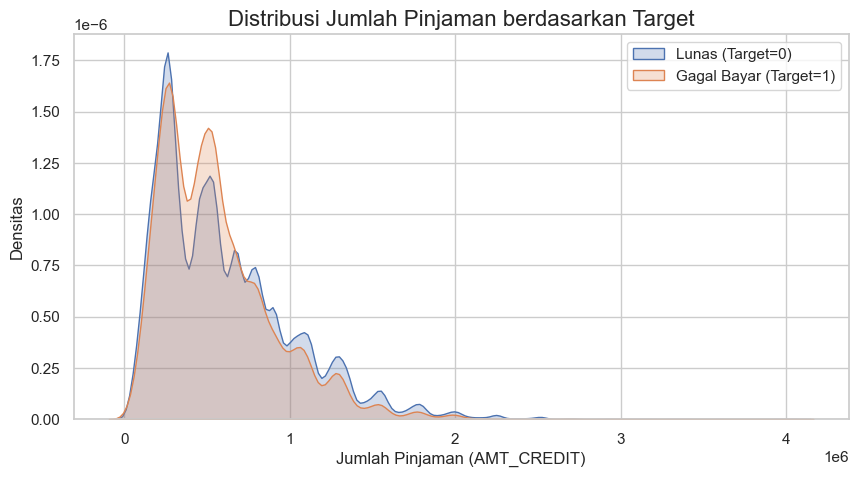

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# --- Insight 1: Distribusi Usia vs Target ---
plt.figure(figsize=(10, 5))
# Kita gunakan kdeplot untuk melihat distribusi probabilitas
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'AGE'], label='Lunas (Target=0)', shade=True)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'AGE'], label='Gagal Bayar (Target=1)', shade=True)
plt.title('Distribusi Usia Peminjam berdasarkan Target', fontsize=16)
plt.xlabel('Usia (Tahun)', fontsize=12)
plt.ylabel('Densitas', fontsize=12)
plt.legend()
plt.show()

# --- Insight 2: Distribusi Pendapatan vs Target ---
# Pendapatan seringkali sangat miring (skewed). Kita filter pendapatan ekstrem untuk visualisasi yang lebih baik.
plt.figure(figsize=(10, 5))
# Kita filter pendapatan di bawah 1 juta untuk fokus ke mayoritas peminjam
df_train_plot = df_train[df_train['AMT_INCOME_TOTAL'] < 1000000]
sns.kdeplot(df_train_plot.loc[df_train_plot['TARGET'] == 0, 'AMT_INCOME_TOTAL'], label='Lunas (Target=0)', shade=True)
sns.kdeplot(df_train_plot.loc[df_train_plot['TARGET'] == 1, 'AMT_INCOME_TOTAL'], label='Gagal Bayar (Target=1)', shade=True)
plt.title('Distribusi Pendapatan Peminjam (di bawah 1 Juta) berdasarkan Target', fontsize=16)
plt.xlabel('Total Pendapatan', fontsize=12)
plt.ylabel('Densitas', fontsize=12)
plt.legend()
plt.show()

# --- Insight 3: Distribusi Jumlah Kredit vs Target ---
plt.figure(figsize=(10, 5))
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'AMT_CREDIT'], label='Lunas (Target=0)', shade=True)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'AMT_CREDIT'], label='Gagal Bayar (Target=1)', shade=True)
plt.title('Distribusi Jumlah Pinjaman berdasarkan Target', fontsize=16)
plt.xlabel('Jumlah Pinjaman (AMT_CREDIT)', fontsize=12)
plt.ylabel('Densitas', fontsize=12)
plt.legend()
plt.show()

### 2. Insight dari Fitur Kategorikal Kunci

C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\2524777955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_agg.values, y=df_agg.index, palette='Reds_d')


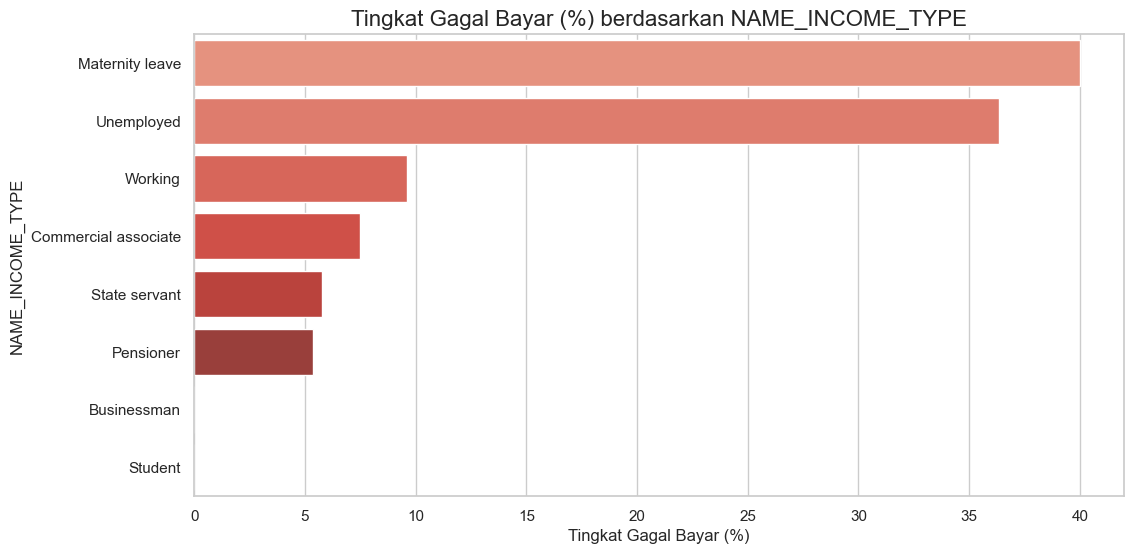

C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\2524777955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_agg.values, y=df_agg.index, palette='Reds_d')


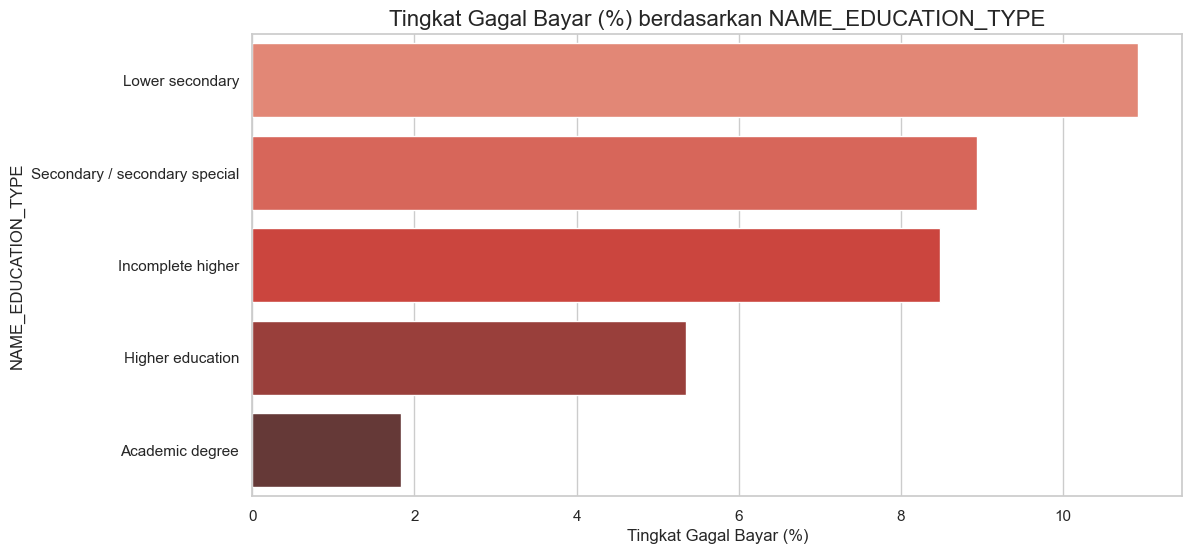

C:\Users\rifqi\AppData\Local\Temp\ipykernel_11008\2524777955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_agg.values, y=df_agg.index, palette='Reds_d')


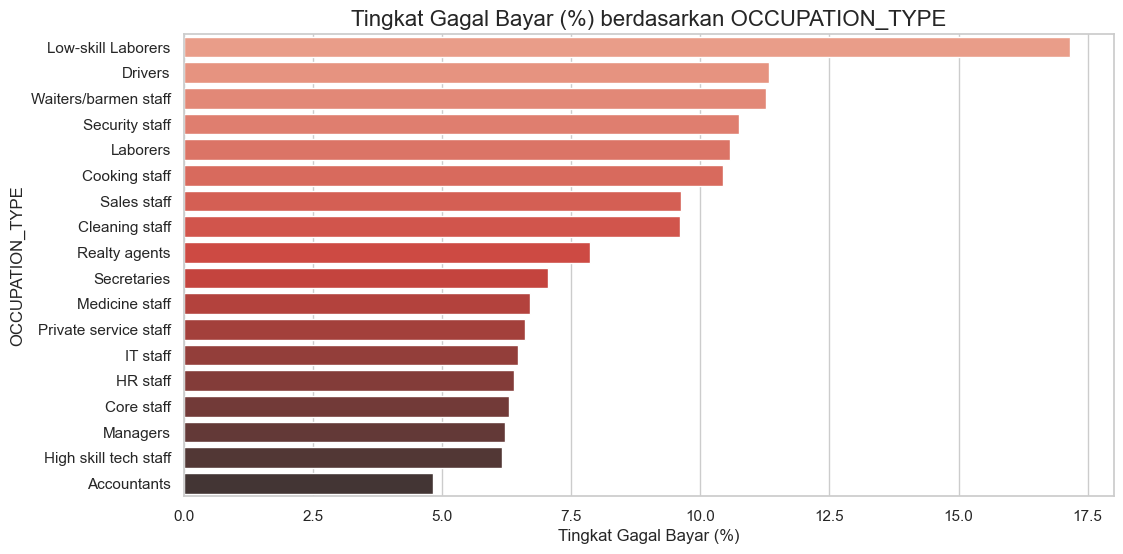

In [24]:
# Fungsi helper untuk plot kategori
def plot_categorical_insight(data, col_name, target_col='TARGET'):
    # Hitung persentase gagal bayar (TARGET=1) untuk setiap kategori
    # Kita gunakan mean() pada kolom TARGET, karena (0,0,1,1) -> mean = 0.5 = 50%
    df_agg = data.groupby(col_name)[target_col].mean().sort_values(ascending=False) * 100
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df_agg.values, y=df_agg.index, palette='Reds_d')
    plt.title(f'Tingkat Gagal Bayar (%) berdasarkan {col_name}', fontsize=16)
    plt.xlabel('Tingkat Gagal Bayar (%)', fontsize=12)
    plt.ylabel(col_name, fontsize=12)
    plt.show()

# --- Insight 4: Tipe Pendapatan (NAME_INCOME_TYPE) ---
plot_categorical_insight(df_train, 'NAME_INCOME_TYPE')

# --- Insight 5: Tingkat Pendidikan (NAME_EDUCATION_TYPE) ---
plot_categorical_insight(df_train, 'NAME_EDUCATION_TYPE')

# --- Insight 6: Tipe Pekerjaan (OCCUPATION_TYPE) ---
# Ini penting karena memiliki 18 kategori
plot_categorical_insight(df_train, 'OCCUPATION_TYPE')

## Langkah 8: Pemodelan (Machine Learning)

### 1. Persiapan Data untuk Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# 1. Pisahkan Fitur (X) dan Target (y)
# X adalah semua kolom KECUALI TARGET dan SK_ID_CURR
X = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_train['TARGET']

print(f"Bentuk X: {X.shape}")
print(f"Bentuk y: {y.shape}")

# 2. Split data: 80% train, 20% test
# Kita gunakan stratify=y agar proporsi TARGET=1 dan TARGET=0
# sama di data train dan test (penting untuk imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")

Bentuk X: (307511, 77)
Bentuk y: (307511,)
Bentuk X_train: (246008, 77)
Bentuk X_test: (61503, 77)


### 2. Melatih Model: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Buat pipeline lengkap: [Preprocessor] -> [Model]

# Kita ambil 'preprocessor' yang sudah kita definisikan di Langkah 6
# (Jika notebook Anda ter-restart, jalankan lagi kode 'preprocessor' dari Langkah 6)

# Tambahkan model Logistic Regression ke dalam pipeline
# Kita gunakan class_weight='balanced' untuk menangani data imbalanced
model_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

# Latih model!
print("\nMemulai pelatihan Logistic Regression...")
model_logreg.fit(X_train, y_train)
print("Pelatihan Logistic Regression selesai.")


Memulai pelatihan Logistic Regression...
Pelatihan Logistic Regression selesai.


### 3. Melatih Model Tambahan

In [29]:
!pip install lightgbm

from lightgbm import LGBMClassifier

# Buat pipeline untuk LGBM
model_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, is_unbalance=True)) # is_unbalance=True adalah handle imbalanced bawaan LGBM
])

# Latih model!
print("\nMemulai pelatihan LightGBM...")
model_lgbm.fit(X_train, y_train)
print("Pelatihan LightGBM selesai.")

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00

Memulai pelatihan LightGBM...
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3636
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] St

## Langkah 9: Evaluasi Hasil Pemodelan

### 1. Evaluasi Logistic Regression

--- Evaluasi Logistic Regression ---
ROC AUC Score: 0.7436

Classification Report:
                 precision    recall  f1-score   support

      Lunas (0)       0.96      0.69      0.80     56538
Gagal Bayar (1)       0.16      0.67      0.26      4965

       accuracy                           0.69     61503
      macro avg       0.56      0.68      0.53     61503
   weighted avg       0.90      0.69      0.76     61503


Confusion Matrix:


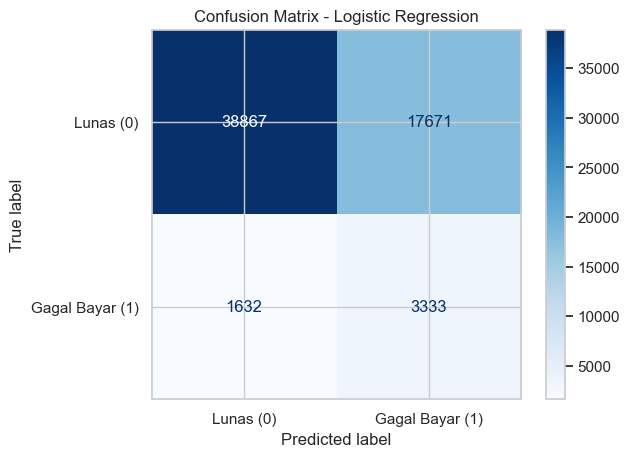

In [30]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Buat prediksi (probabilitas dan kelas) di X_test
print("--- Evaluasi Logistic Regression ---")
y_pred_logreg = model_logreg.predict(X_test)
y_proba_logreg = model_logreg.predict_proba(X_test)[:, 1] # Ambil probabilitas untuk kelas 1

# 2. Hitung ROC AUC
auc_logreg = roc_auc_score(y_test, y_proba_logreg)
print(f"ROC AUC Score: {auc_logreg:.4f}")

# 3. Tampilkan Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=['Lunas (0)', 'Gagal Bayar (1)']))

# 4. Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Lunas (0)', 'Gagal Bayar (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 2. Evaluasi LightGBM


--- Evaluasi LightGBM ---


e:\Application\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ROC AUC Score: 0.7526

Classification Report:
                 precision    recall  f1-score   support

      Lunas (0)       0.96      0.70      0.81     56538
Gagal Bayar (1)       0.16      0.68      0.27      4965

       accuracy                           0.70     61503
      macro avg       0.56      0.69      0.54     61503
   weighted avg       0.90      0.70      0.76     61503


Confusion Matrix:


e:\Application\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


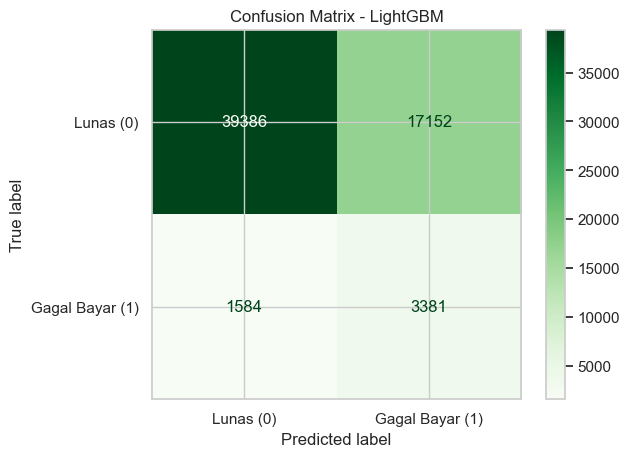

In [31]:
# 1. Buat prediksi (probabilitas dan kelas) di X_test
print("\n--- Evaluasi LightGBM ---")
y_pred_lgbm = model_lgbm.predict(X_test)
y_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1] # Ambil probabilitas untuk kelas 1

# 2. Hitung ROC AUC
auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print(f"ROC AUC Score: {auc_lgbm:.4f}")

# 3. Tampilkan Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=['Lunas (0)', 'Gagal Bayar (1)']))

# 4. Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=['Lunas (0)', 'Gagal Bayar (1)'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - LightGBM')
plt.show()